<a href="https://colab.research.google.com/github/Adity-star/Data-Science-Work/blob/main/Seaborn_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [ ]:
df = sns.load_dataset('diamonds')

###`Q 1-3` Using the 'diamonds' dataset - sns.load_dataset('diamonds')
1. Create a violinplot of 'price' grouped by 'cut'.
2. Create regplot on `carat` vs `price`. and give hue on 'cut'
3. Create boxplot on 'color' and 'price'

<Axes: xlabel='color', ylabel='price'>

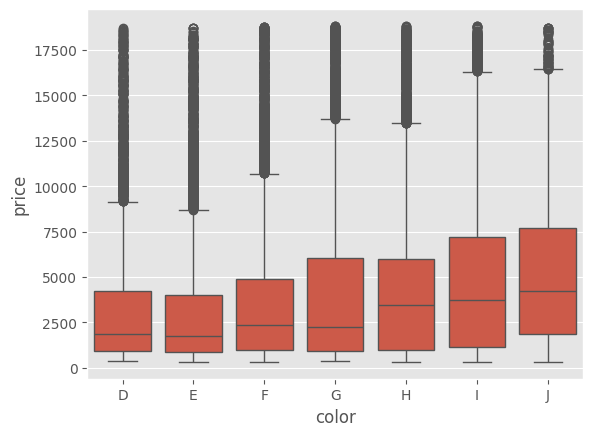

In [ ]:
sns.boxplot(x='color',y='price',data = df)

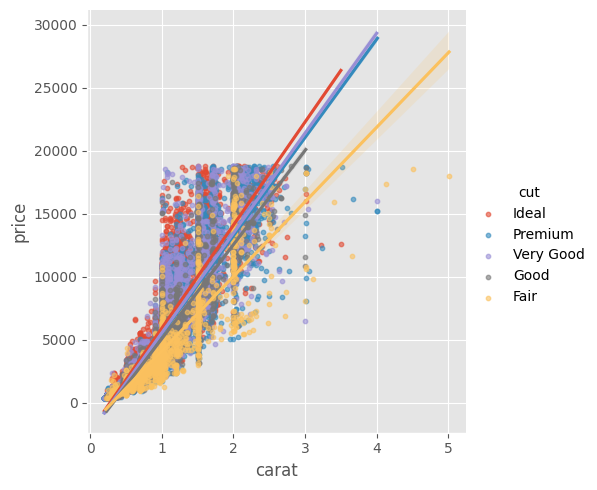

In [ ]:
h = sns.FacetGrid(df,hue='cut',height=5)
h.map(sns.regplot,'carat','price',scatter_kws={'s': 10, 'alpha': 0.6})
h.add_legend()
plt.show()

<Axes: xlabel='cut', ylabel='price'>

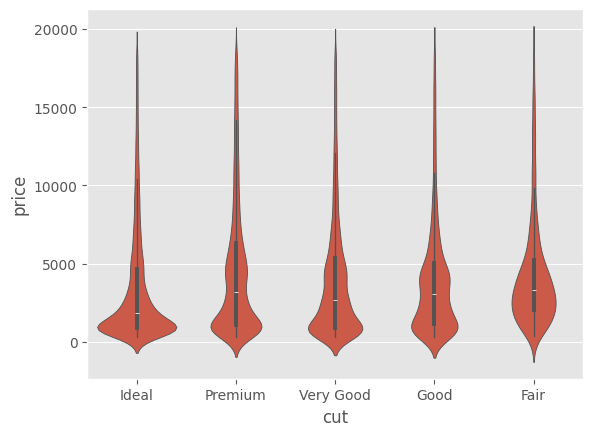

In [ ]:
# cod
df =  sns.load_dataset('diamonds')
sns.violinplot(x='cut', y = 'price', data = df)

###`Q 4` Using the 'Taxis' dataset - sns.load_dataset('taxis')
4.1. Create a categorical estimate plot of the totl fare - 'total' for each payment type - 'payment'.

4.2. Create a regression plot on time of ride  vs total fare. You will need to calculate ride time using pickup and dropoff column.

4.3 Give hue on payment type. and Another plot hue on taxi 'color'. Observe the plot.

In [ ]:
df=sns.load_dataset('taxis')
df.head(2)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan


<Axes: xlabel='ride_time', ylabel='total'>

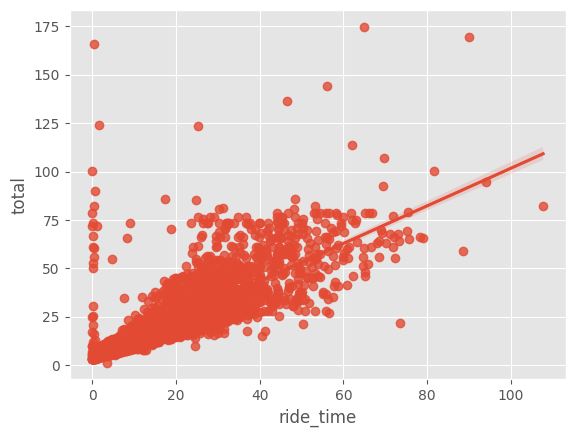

In [ ]:
df['pickup'] = pd.to_datetime(df['pickup'])
df['dropoff'] = pd.to_datetime(df['dropoff'])
df['ride_time'] = (df['dropoff'] - df['pickup']).dt.total_seconds()/60
sns.regplot(x='ride_time', y='total', data=df)


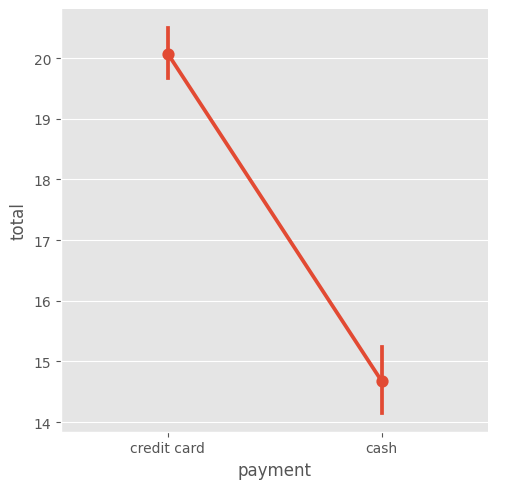

In [ ]:
# code here
df = sns.load_dataset('taxis')
sns.catplot(data=df,x='payment',y='total',kind='point')

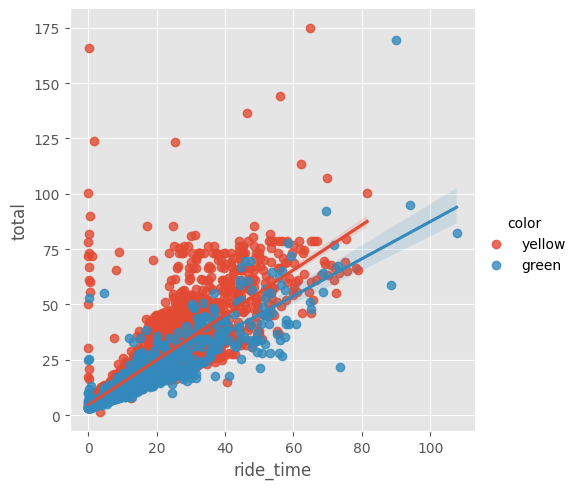

In [ ]:
df['ride_time'] = (df['dropoff'] - df['pickup']).dt.total_seconds()/60

sns.lmplot(data=df,x='ride_time',y='total',hue='color')

## Problem 5-12:

### **`Problem 5:`** Draw a strip plot and swarm plot between "gender" and "bloodpressure" w.r.t "smoker" (use as hue parameter). Also add title to the charts.

In [ ]:
# code here
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQVpcVtdYdZU4zU4-lqxt-iPHkyndDWs_aqEDUu9ZodlJ48Dku0PFgdXlj2N5RCmwXJrNtZLsI_wEVf/pub?gid=220677750&single=true&output=csv')
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


Text(0.5, 1.0, 'BP Vs Gender vs Smoker')

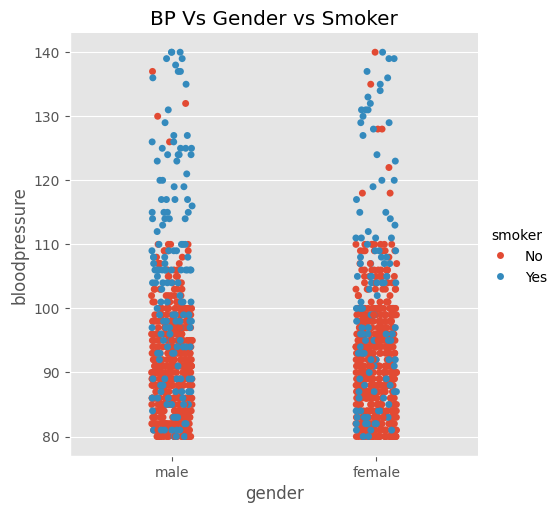

In [ ]:
sns.catplot(data=df,kind='strip',x='gender',y='bloodpressure',hue='smoker')
plt.title('BP Vs Gender vs Smoker')

<Axes: xlabel='gender', ylabel='bloodpressure'>

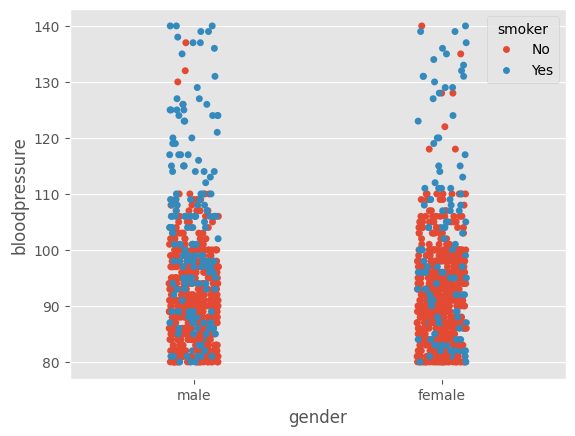

In [ ]:
# code here
sns.stripplot(x='gender',y='bloodpressure',data = df,hue='smoker')

### **`Problem 6:`** Draw a Box-plot and a Violin plot of which x-axis represents the "region" and the y-axis represents the "bmi". Also add extra information of the column "diabetic".

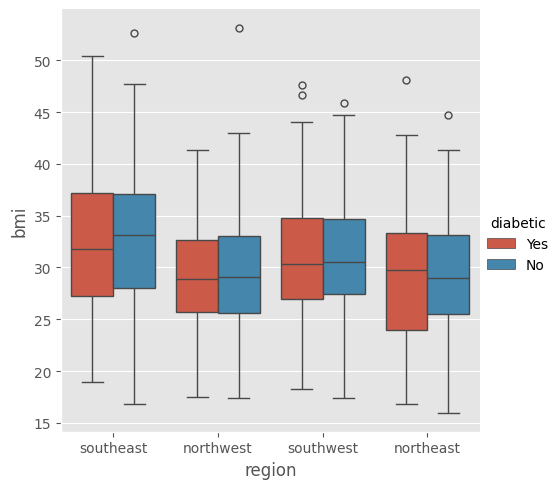

In [ ]:
# code here
sns.catplot(data=df,kind='box',x='region',y='bmi',hue='diabetic')

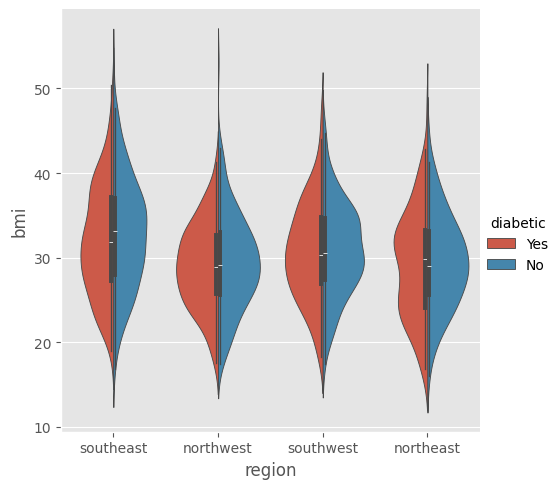

In [ ]:
sns.catplot(data=df,kind='violin',x='region',y='bmi',hue='diabetic',split=True)

### **`Problem  7:`** Draw a bar plot and point plot of which x-axis represents the "gender" and y-axis represents "claim". Also add extra information about "smoker" column.

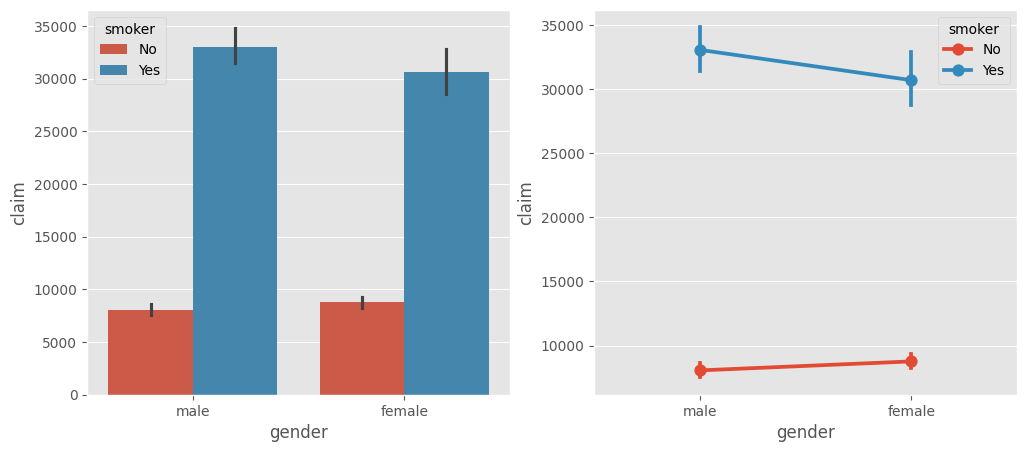

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.barplot(x='gender',y='claim',hue='smoker',data=df,ax=ax[0])

sns.pointplot(x='gender',y='claim',hue='smoker',data=df,ax=ax[1])

plt.show()

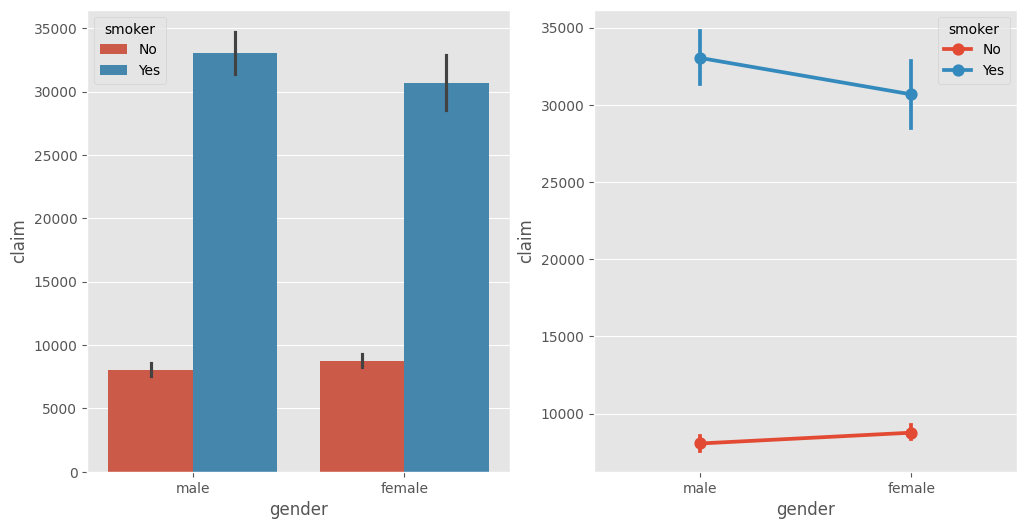

In [ ]:
# code here
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.barplot(data=df,x='gender',y='claim',hue='smoker',ax=ax[0])
sns.pointplot(data=df,x='gender',y='claim',hue='smoker',ax=ax[1])
plt.show()

### **`Problem 8:`** Draw a reg plot between "age" and "bmi" columns.

<Axes: xlabel='age', ylabel='bmi'>

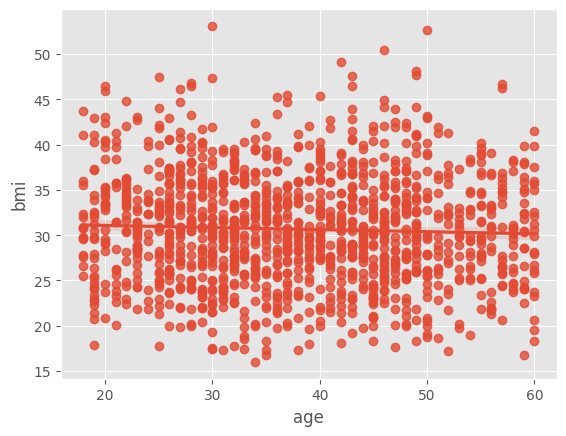

In [ ]:
# code here


sns.regplot(x='age',y='bmi',data=df)


### **`Problem 9:`** Draw a pair plot of the insurance data. Use "gender" as hue parameter.

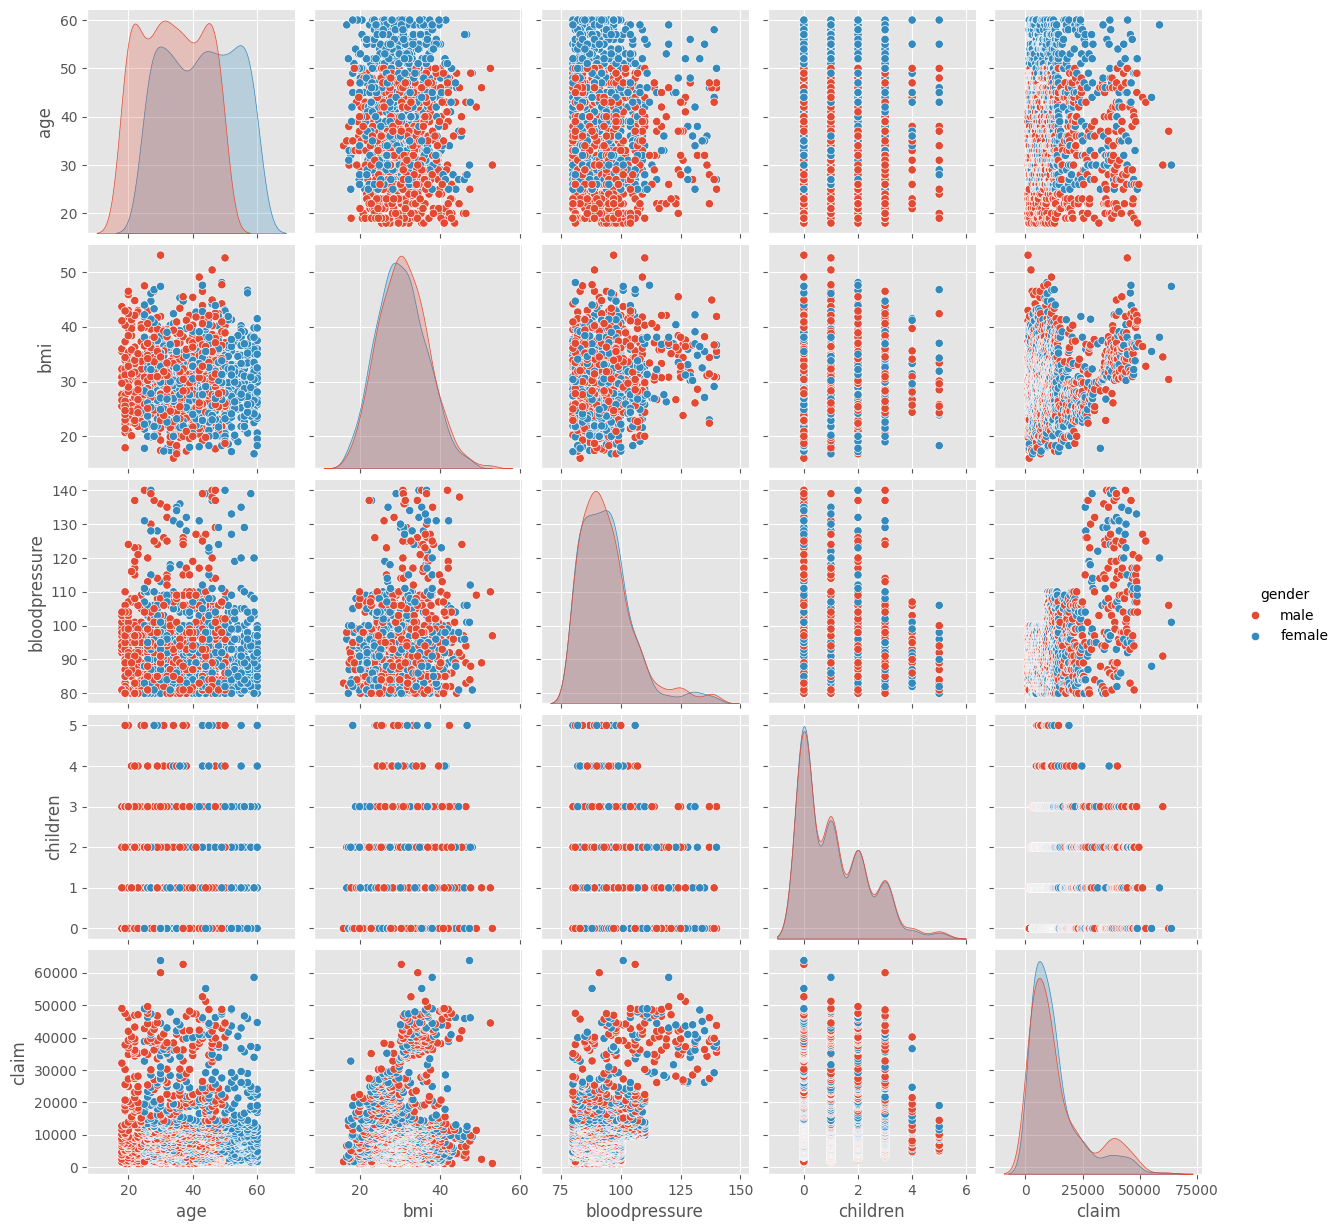

In [ ]:
# code here
sns.pairplot(data=df.drop(columns=['index','PatientID']),hue='gender' )

### **`Problem 10:`** Draw a pair grid of the insurance data and use "diabetic" column as a hue parameter. Also, make the diagonal plots as box-plot, upper parts as scatter plot and the lower parts as kde plot.

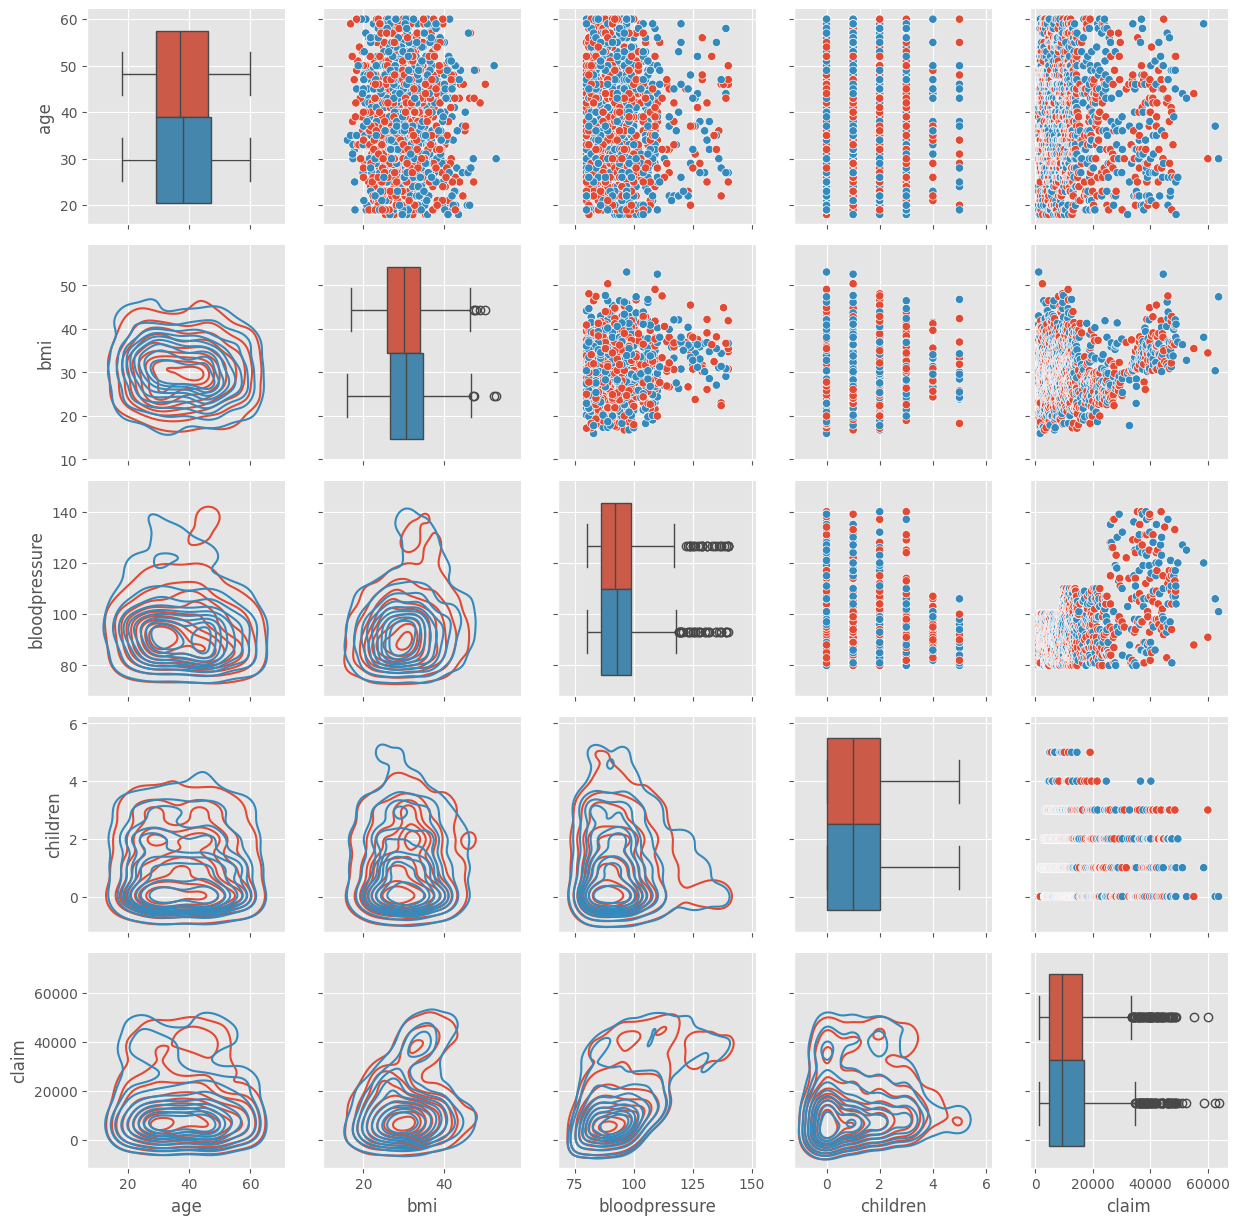

In [ ]:
# code here
g = sns.PairGrid(df.drop(columns=['index','PatientID']),hue='diabetic')

g.map_diag(sns.boxplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

### **`Prolem 11:`** Draw a joint plot as scatter between "bloodpressure" and "bmi". Use "smoker" as hue parameter.

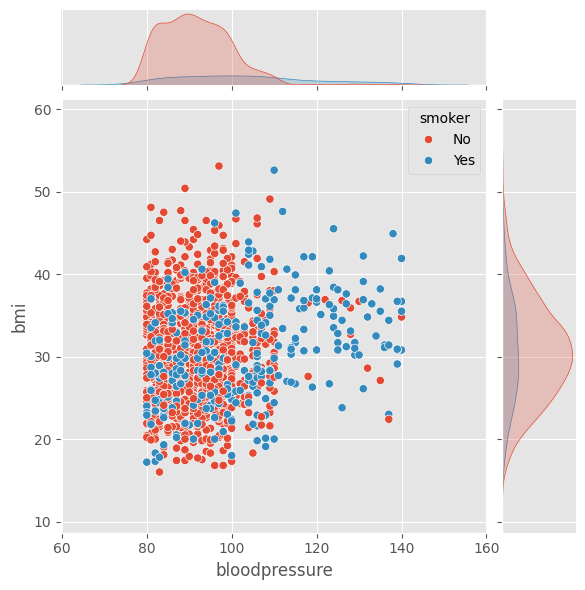

In [ ]:
# code here
sns.jointplot(data=df,kind='scatter',x='bloodpressure',y='bmi',hue='smoker')

### **`Problem 12:`** Draw a joint grid of which x-axis represents "age" and y-axis represents "claim". Draw

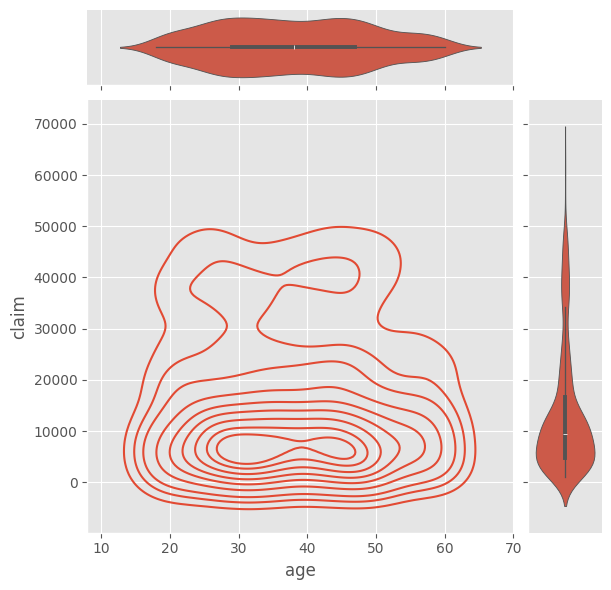

In [ ]:
# code here
g = sns.JointGrid(x='age',y='claim',data=df)
g.plot(sns.kdeplot,sns.violinplot)